<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Resub-DS-26/blob/main/Simple%20linear%20regression(Salarydata).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
path = r"/content/Salary_Data.csv"
dataset = pd.read_csv(path)

In [3]:
print(dataset.head())


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [4]:
print(dataset.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


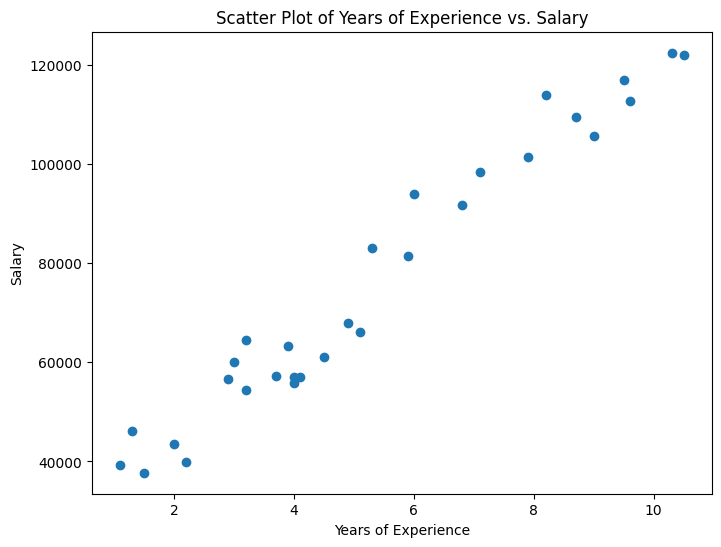

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(dataset['YearsExperience'], dataset['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter Plot of Years of Experience vs. Salary')
plt.show()

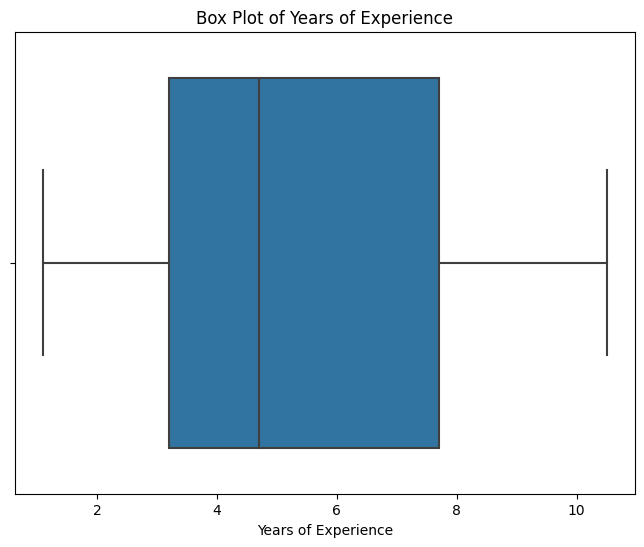

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='YearsExperience')
plt.xlabel('Years of Experience')
plt.title('Box Plot of Years of Experience')
plt.show()

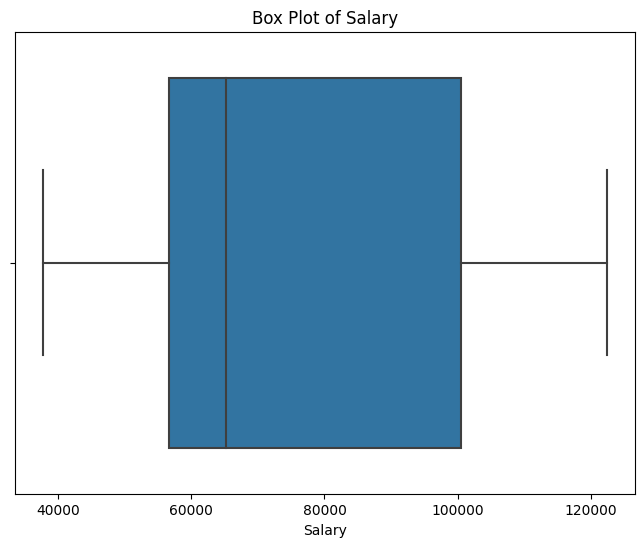

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='Salary')
plt.xlabel('Salary')
plt.title('Box Plot of Salary')
plt.show()

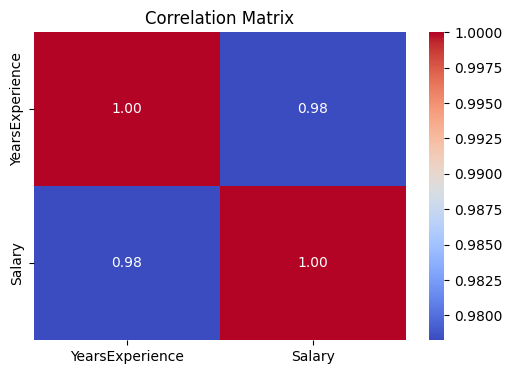

In [8]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [9]:
X = dataset[['YearsExperience']]
y = dataset['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model_1 = smf.ols('Salary ~ YearsExperience', data=dataset).fit()
model_2 = smf.ols('Salary ~ np.log(YearsExperience)', data=dataset).fit()
model_3 = smf.ols('Salary ~ np.sqrt(YearsExperience)', data=dataset).fit()
model_4 = smf.ols('Salary ~ np.exp(YearsExperience)', data=dataset).fit()

In [12]:
print("R-squared values:")
print("Model 1 (No transformation):", model_1.rsquared)
print("Model 2 (Log transformation):", model_2.rsquared)
print("Model 3 (Square root transformation):", model_3.rsquared)
print("Model 4 (Exponential transformation):", model_4.rsquared)

R-squared values:
Model 1 (No transformation): 0.9569566641435086
Model 2 (Log transformation): 0.8538888828756969
Model 3 (Square root transformation): 0.9310009544993526
Model 4 (Exponential transformation): 0.47238440560728734


In [13]:
best_model = model_1
best_model_name = "Model 1 (No transformation)"
if model_2.rsquared > best_model.rsquared:
    best_model = model_2
    best_model_name = "Model 2 (Log transformation)"
if model_3.rsquared > best_model.rsquared:
    best_model = model_3
    best_model_name = "Model 3 (Square root transformation)"
if model_4.rsquared > best_model.rsquared:
    best_model = model_4
    best_model_name = "Model 4 (Exponential transformation)"

In [15]:
print("\nBest Model:", best_model_name)


Best Model: Model 1 (No transformation)


In [16]:
predictions = model_1.predict(X_test)

In [17]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Absolute Error (Test):", mae)
print("Mean Squared Error (Test):", mse)
print("R-squared (Test):", r2)

Mean Absolute Error (Test): 6292.990580363774
Mean Squared Error (Test): 46452879.754848056
R-squared (Test): 0.9090578530656057


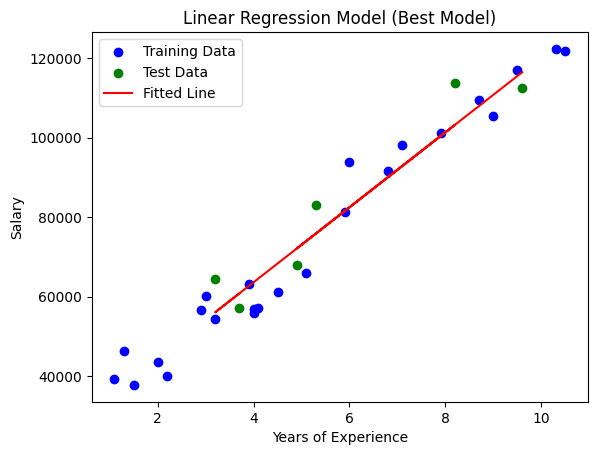

In [18]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, predictions, color='red', label='Fitted Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression Model (Best Model)')
plt.legend()
plt.show()